In [13]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing OpenAI Gym
It is a python library that wraps many classical decision problems including robot control, videogames and board games. My favourite Library after scikit-learn in python so far. 

Observation space: Box(2,)
Action space: Discrete(3)


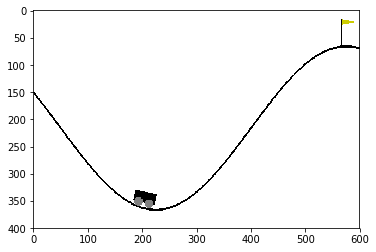

In [14]:

import gym
env = gym.make("MountainCar-v0")

plt.imshow(env.render('rgb_array'))
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

# Gym interface
The three main methods of an environment are

reset() - reset environment to initial state, return first observation

render() - show current environment state

step(a) - commit action a and return (new observation, reward, is done, info)

    new observation - an observation right after commiting the action a
    reward - a number representing your reward for commiting action a
    is done - True if the MDP has just finished, False if still in progress
    info - information about whats just happened

In [18]:
obs0 = env.reset()
print("initial observation code:", obs0)

#here observation is car position and velocity

initial observation code: [-0.52332401  0.        ]


In [16]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

taking action 2 (right)
new observation code: [-0.48163916  0.00069128]
reward: -1.0
is game over?: False


# Below is a strategy to move the car (Agent) to reach the Flag. 

ps : I dont like gravity so does my agent. 

The strategy is for the first few time steps made the agent(car) to reach left till my agent gets some push after that I moved my agent to the right to continue that push. The push it had in the consequent routines helped my agent to reach its goal. cool isn't it? :D

<IPython.core.display.Javascript object>


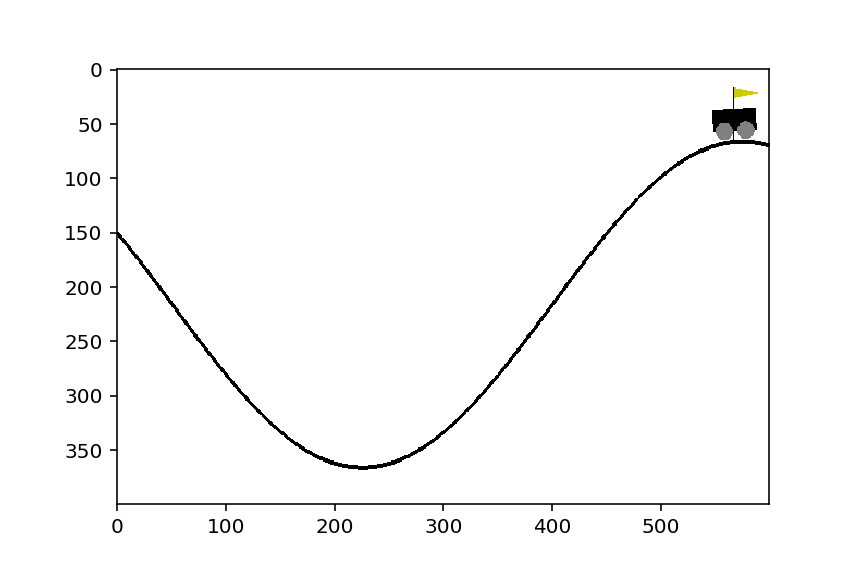

Reached the Flag


In [22]:
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# prepare "display"
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(s, t):
    if t < 50:
        return actions['left']
    elif t < 100:
        return actions['right']
    elif t < 150:
        return actions['left']
    else:
        return actions['right']
    


for t in range(TIME_LIMIT):
    
    s, r, done, _ = env.step(policy(s, t))
    
    #draw game image on display
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Reached the Flag")
        break
